In [17]:
#Visualize Samples from the model
import sys,os,glob
from collections import OrderedDict
sys.path.append('../../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=5
mpl.rcParams['lines.markersize']=10
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 40
mpl.rcParams['axes.labelsize']=40
mpl.rcParams['legend.fontsize']=40
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, getUniqueIDFromParams
from optvaeutils.viz import getName
subdirectories = ['none','finopt']

#DIR = '../../expt/results_dec19/chkpt-rcv2_miao-';MAXEPOCH='200'
DIR = '../../expt/chkpt-wikicorp-';MAXEPOCH='50'

short_names = {}
if os.path.exists('../../optvaeutils/default-hmap.pkl'):
    short_names = readPickle('../../optvaeutils/default-hmap.pkl')[0]
colors = {}
colors[0] = 'r'
colors[1] = 'b'
colors[2] = 'g'
colors[3] = 'k'
colors[4] = 'y'
colors[5] = 'k'
colors[6] = 'm'
colors[7] = 'c'
colors[8] = 'b'

markers = {}
markers[0]= '*'
markers[1]= '<'
markers[2]= '>'
markers[3]= '8'
markers[4]= 'p'
markers[5]= 'v'
markers[6]= '3'
markers[7]= '2'
markers[8]= '4'

#Evalaute POB 
from datasets.load import loadDataset
from optvaedatasets.load import loadDataset as loadDataset_OVAE
dataset        =DIR.split('chkpt-')[1][:-1]
print 'Dataset:', dataset
dset = loadDataset_OVAE(dataset)
NLL_train_prob,NLL_valid_prob = np.nan,np.nan


Dataset: wikicorp
Read  3  objects


In [2]:
#Visualize Training Curves (train/valid/test) across different 
datalist, l_params, namelist, svallist = [],[],[],[]
ctr = 0
for sdir in subdirectories:
    print sdir,DIR+sdir+'/*EP'+MAXEPOCH+'*.h5'
    #print DIR+sdir+'/*EP200*.h5'
    for f in glob.glob(DIR+sdir+'/*EP'+MAXEPOCH+'*.h5'):
        print f,
        if 'normalize' in f:
            continue
        params = readPickle(getConfigFile(f))[0]
        params['replicate_K'] = None
        if params['anneal_rate']>100:
            continue
        name   = getName(params)
        data   = loadHDF5(f)
        l_params.append(params)
        datalist.append(data)
        namelist.append(name)
        if 'valid_bound_0' in data:
            min_0 = np.min(data['valid_bound_0'][:,1])
            min_f = np.min(data['valid_bound_f'][:,1])
            amin  = np.argmin(data['valid_bound_f'][:,1])
            epmin = data['valid_bound_f'][amin,0]
        elif 'valid_perp_0' in data:
            min_0 = np.min(data['valid_perp_0'][:,1])
            min_f = np.min(data['valid_perp_f'][:,1])
            amin  = np.argmin(data['valid_perp_f'][:,1])
            epmin = data['valid_perp_f'][amin,0]
        else:
            print data.keys()
            min_0 = np.min(data['valid_perp_bound_0'][:,1])
            min_f = np.min(data['valid_perp_bound_f'][:,1])
            amin  = np.argmin(data['valid_perp_bound_f'][:,1])
            epmin = data['valid_perp_bound_f'][amin,0]
        
        print epmin,amin
        Wfiles = np.load(f.split('-final')[0].split('-EP')[0]+'-EP'+str(int(epmin))+'-params.npz')
        if 'p_0_W' in Wfiles:
            svals  = np.sort(np.linalg.svd(Wfiles['p_0_W'],compute_uv=False))
        else: 
            svals  = np.sort(np.linalg.svd(Wfiles['p_mean_W'],compute_uv=False))
        svallist.append(svals)
        print ctr,name,min_0,min_f
        ctr+=1
p_names = getUniqueIDFromParams(l_params, short_names = short_names)
names   = []
for a,b in zip(namelist,p_names):
    names.append(a+b)
idxlist = []
print '\n'
#Restriction
for idx,name in enumerate(names):
    print idx,name
    idxlist.append(idx)
svallist = [svallist[k] for k in idxlist]
datalist = [datalist[k] for k in idxlist]
def update_name(name):
    pl   = str(int(name.split('p_layers-')[1].split('-')[0])+1)
    if 'baseline' in name:
        return pl+'-M1'
    else:
        return pl+'-M'+name.split('fin')[1].split('-')[0]
#names = [names[k] for k in idxlist]
names = [update_name(names[k]) for k in idxlist]

results = {}
for idx,name in enumerate(names):
    results[name] = datalist[idx]

print '\n Restricted Plots to: ',names

none ../../expt/chkpt-wikicorp-none/*EP50*.h5
../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-1_0e+04-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-0-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
50.0 11
0 baseline 1477.2710467 1339.22622251
../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-2-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-5_0e+04-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
../../expt/chkpt-wikicorp-none/VAE_lr-8_0e-04-ph-400-qh-400-ds-100-pl-0-ql-2-nl-relu-bs-500-ep-52-plr-1_0e-02-ar-0-otype-none-ns-100-etype-mlp-ll-mult-itype-tfidfl20_01_-uid-EP50-stats.h5 Read  1  objects
50.0 11
1 baseline 1478.41915117 1377.33962743
../../expt/chkpt-wikicorp-non

[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
1-M1 1377.33962743 11
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
1-M100 1364.45930838 11
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M1 1339.22622251 11
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M100 1175.70214735 11
bounds-wikicorp.pdf saved


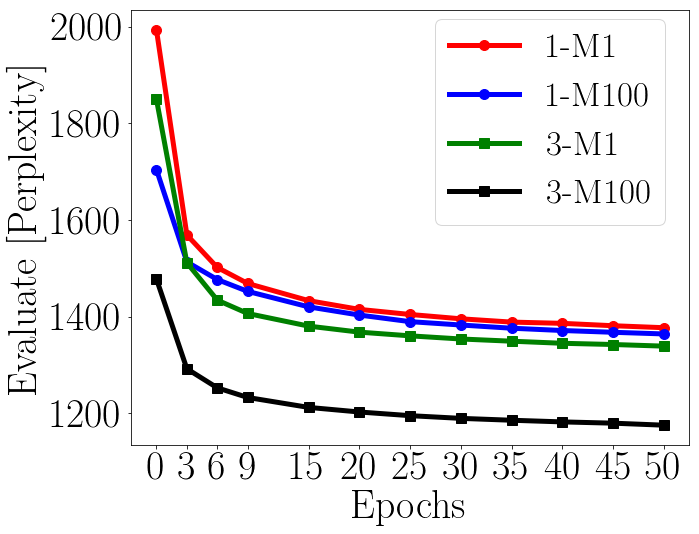

In [89]:
#Visualize Training Curves (train/valid/test)

NS = 'M100'
if 'wikicorp' in dataset:
    NS = 'M100'

colorFinal = {}
colorFinal['1-M1']    = 'r'
colorFinal['1-'+NS]  = 'b'
colorFinal['3-M1']    =  'g'
colorFinal['3-'+NS]  =  'k'
markerFinal = {}
markerFinal['1-M1']   = 'o'
markerFinal['1-'+NS] = 'o'
markerFinal['3-M1']   =  's'
markerFinal['3-'+NS] =  's'

namemap = OrderedDict()
namemap['1-M1']   = '$p1$'
namemap['1-'+NS]  = 'p1-$\\psi_{\\text{opt.}}$'
namemap['3-M1']   =  '$p3$'
namemap['3-'+NS]  =  'p3-$\\psi_{\\text{opt.}}$'


fig,axlist     = plt.subplots(1,1,figsize=(10,8))  
ax = axlist
for name in ['1-M1','1-'+NS,'3-M1','3-'+NS]:
    data = results[name]
    print data.keys()
    if 'valid_perp_bound_0' in data:
        valid_bound_0 = data['valid_perp_bound_0']
        valid_bound_f = data['valid_perp_bound_f']
    elif 'valid_perp_0' in data:
        valid_bound_0 = data['valid_perp_0']
        valid_bound_f = data['valid_perp_f']
    else:
        valid_bound_0 = data['valid_bound_0']
        valid_bound_f = data['valid_bound_f']
    print name,np.min(valid_bound_f[:,1]),np.argmin(valid_bound_f[:,1])
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
        
    #ax.plot(valid_bound_0[:,0],valid_bound_0[:,1],'--',color=COLOR,marker = MARKER)
    ax.plot(valid_bound_f[:,0],valid_bound_f[:,1],marker = MARKER,color=COLOR,label=name)

ax.set_ylabel('Evaluate [Perplexity]')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')
if 'rcv2_miao' in dataset:
    ax.set_xlim([0,200])
    ax.set_ylim([300,600])
if 'wikicorp' in dataset:
    ax.set_xticks(X)
if 'wikicorp' in dataset:
    pass
    ax.legend(loc='upper center', bbox_to_anchor=(0.75, 1.02),ncol=1, frameon=True,columnspacing=0.1, prop={'size': 35})
else:
    ax.legend(loc='upper center', bbox_to_anchor=(.52, 1.05),ncol=2, frameon=False,columnspacing=0.1)
    
fname = 'bounds-'+dataset+'.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
1-M1
[  0.   3.   6.   9.  15.  20.  25.  30.  35.  40.  45.  50.]
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
1-M100
[  0.   3.   6.   9.  15.  20.  25.  30.  35.  40.  45.  50.]
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M1
[  0.   3.   6.   9.  15.  20.  25.  30.  35.  40.  45.  50.]
[u'valid_perp_0', u'train_bound_0', u'batch_time', u'train_perp_0', u'svals', u'valid_perp_f', u'train_bound_f', u'glcov', u'train_perp_f', u'gmu', u'diff_elbo']
3-M100
[  0.   3.   6.   9.  15.  20.  25.  30.  35.  40.  45.  50.]
train-bounds-wikicorp.pdf saved


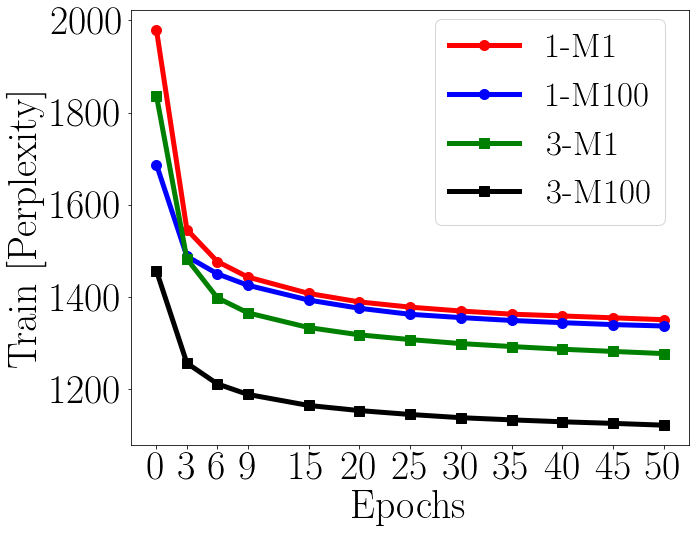

In [88]:
#Visualize Training Curves (train/valid/test)

NS = 'M100'
if 'wikicorp' in dataset:
    NS = 'M100'

colorFinal = {}
colorFinal['1-M1']    = 'r'
colorFinal['1-'+NS]  = 'b'
colorFinal['3-M1']    =  'g'
colorFinal['3-'+NS]  =  'k'
markerFinal = {}
markerFinal['1-M1']   = 'o'
markerFinal['1-'+NS] = 'o'
markerFinal['3-M1']   =  's'
markerFinal['3-'+NS] =  's'

namemap = OrderedDict()
namemap['1-M1']   = '$p1$'
namemap['1-'+NS] = 'p1-$\\psi_{\\text{opt.}}$'
namemap['3-M1']   =  '$p3$'
namemap['3-'+NS] =  'p3-$\\psi_{\\text{opt.}}$'


fig,axlist     = plt.subplots(1,1,figsize=(10,8))  
ax = axlist
for name in namemap:
    data = results[name]
    print data.keys()
    train_bound_0 = data['train_perp_0']
    train_bound_f = data['train_perp_f']
    print name
    MARKER = markerFinal[name]
    COLOR  = colorFinal[name]
    if 'rcv2' in dataset:
        X  = train_bound_0[:,0][::20]
        Y  = train_bound_0[:,1][::20]
    else:
        X  = train_bound_0[:,0][::5]
        Y  = train_bound_0[:,1][::5]
    #ax.plot(X,Y,'--',color=COLOR,marker = MARKER)
    if 'rcv2' in dataset:
        X  = train_bound_f[:,0][::20]
        Y  = train_bound_f[:,1][::20]
    else:
        X  = train_bound_f[:,0]#[::5]
        Y  = train_bound_f[:,1]#[::5]
    print X
    ax.plot(X,Y,marker = MARKER,color=COLOR,label=name)

ax.set_ylabel('Train [Perplexity]')
ax.set_xlabel('Epochs')
ax.hlines(NLL_valid_prob, 0, ax.get_xlim()[1], linestyles='dashdot',colors='k')
if 'rcv2_miao' in dataset:
    pass
    #ax.set_xlim([0,200])
    #ax.set_ylim([300,600])
if 'wikicorp' in dataset:
    pass
    #ax.set_ylim([2200,2300])
    ax.set_xticks(X)
if 'wikicorp' in dataset:
    pass
    ax.legend(loc='upper center', bbox_to_anchor=(0.75, 1.02),ncol=1, frameon=True,columnspacing=0.1, prop={'size': 35})
else:
    ax.legend(loc='upper center', bbox_to_anchor=(.52, 1.05),ncol=2, frameon=True,columnspacing=0.1)
    
fname = 'train-bounds-'+dataset+'.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')

1-M1
1-M100
3-M1
3-M100
logsingular-wikicorp.pdf saved


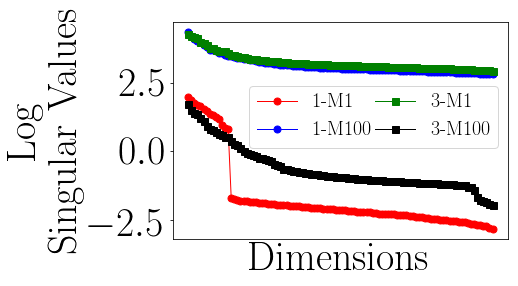

In [93]:
#Plot Eigenspectrum of first W matrix
for idx,(svals,name) in enumerate(zip(svallist,namemap.keys())):
    if 'res' in name:
        continue
    MARKER = markers[idx]
    COLOR  = colors[idx]
    if name in markerFinal:
        MARKER = markerFinal[name]
        COLOR  = colorFinal[name]
    print name
    plt.plot(np.arange(len(svals)),np.log(svals[::-1]),marker=MARKER,color=COLOR,ms=7,lw=1,label = name)
plt.legend(loc='upper center', bbox_to_anchor=(0.6, 0.75),ncol=2, frameon=True, prop={'size': 20},columnspacing=0.1)
plt.ylabel('Log\n Singular Values')
plt.xlabel('Dimensions')
plt.xticks([])
fname = 'logsingular-'+dataset+'.pdf'
print fname,'saved'
plt.savefig(fname,bbox_inches='tight')